In [2]:
import pandas as pdpd


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\amazon_delivery.csv", encoding="ISO-8859-1")

# Display the first few rows of the dataframe
print(df.head())


        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       Sunny    High   motorcycle

In [8]:
# Display information about the dataset
print(df.info())

# Check for null values
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:\n", df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
N

In [9]:
# Handle null values

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill null values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill null values in non-numeric columns with forward fill
df[non_numeric_cols] = df[non_numeric_cols].fillna(method='ffill')

# Verify that null values have been handled
print("Null values after handling:\n", df.isnull().sum())


Null values after handling:
 Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_19088\3870296910.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[non_numeric_cols] = df[non_numeric_cols].fillna(method='ffill')


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Distribution of a numerical column if exists (replace 'price' with an actual numeric column name from your dataset)
if 'price' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], bins=20, kde=True)
    plt.title('Distribution of Product Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'price' does not exist in the dataset.")


Column 'price' does not exist in the dataset.


In [11]:
# Plot Count Plot for a categorical column if exists (replace 'category' with an actual categorical column name from your dataset)
if 'category' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='category', data=df)
    plt.title('Count of Different Product Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if categories are too many or long
    plt.show()
else:
    print("Column 'category' does not exist in the dataset.")


Column 'category' does not exist in the dataset.


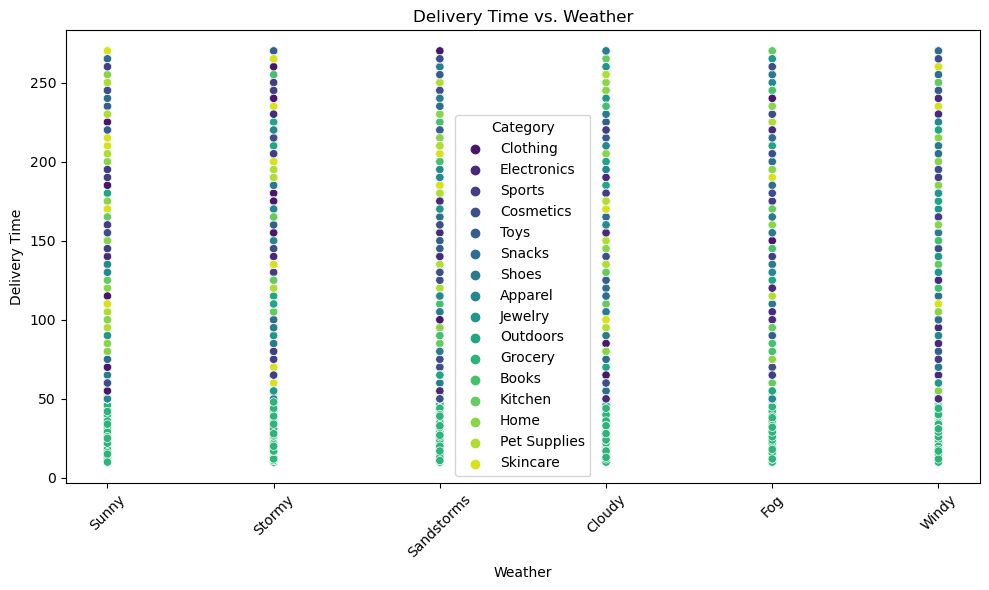

In [15]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weather', y='Delivery_Time', data=df, hue='Category', palette='viridis')
plt.title('Delivery Time vs. Weather')
plt.xlabel('Weather')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


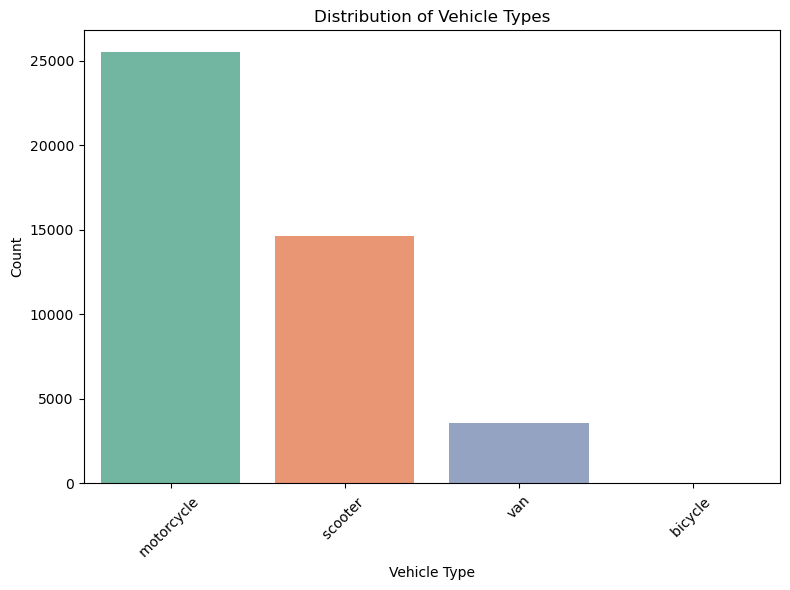

In [16]:
# Countplot of Vehicle
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle', data=df, palette='Set2')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


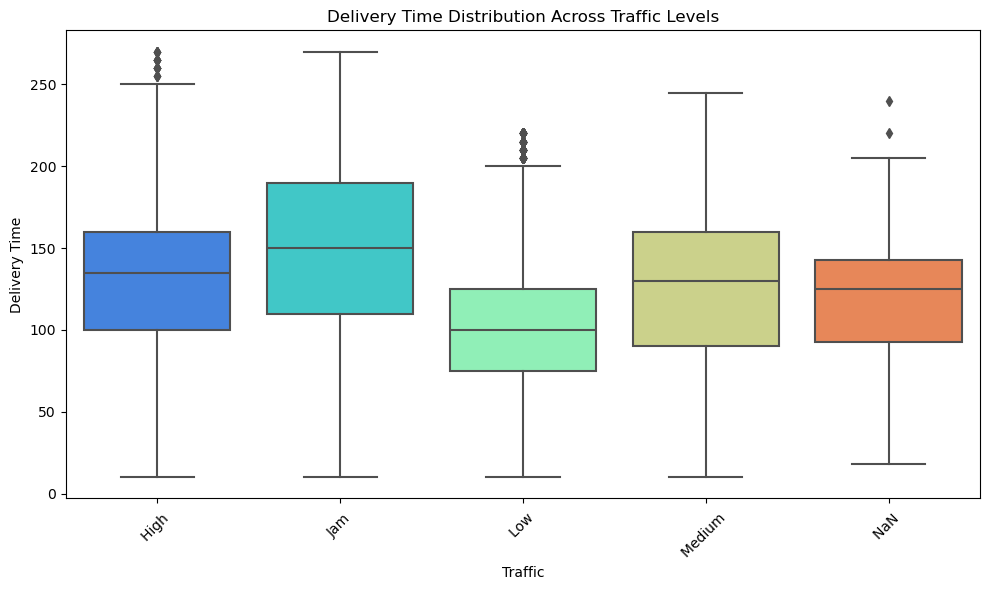

In [17]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df, palette='rainbow')
plt.title('Delivery Time Distribution Across Traffic Levels')
plt.xlabel('Traffic')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\HP\Downloads\Programs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\Downloads\Programs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\Downloads\Programs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


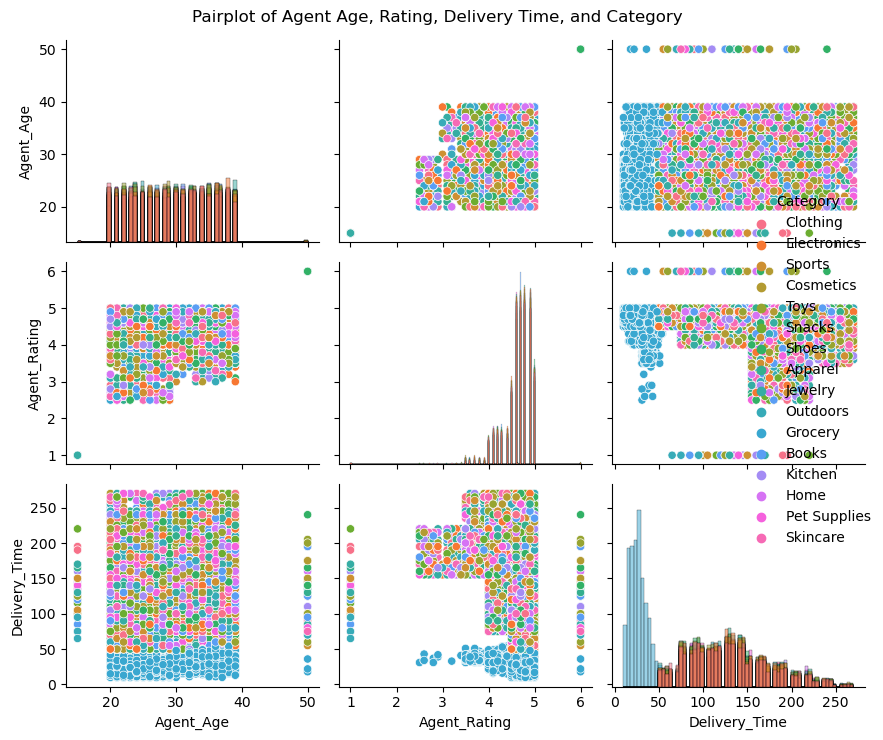

In [18]:
# Pairplot
sns.pairplot(df[['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Category']], hue='Category', diag_kind='hist')
plt.suptitle('Pairplot of Agent Age, Rating, Delivery Time, and Category')
plt.tight_layout()
plt.show()


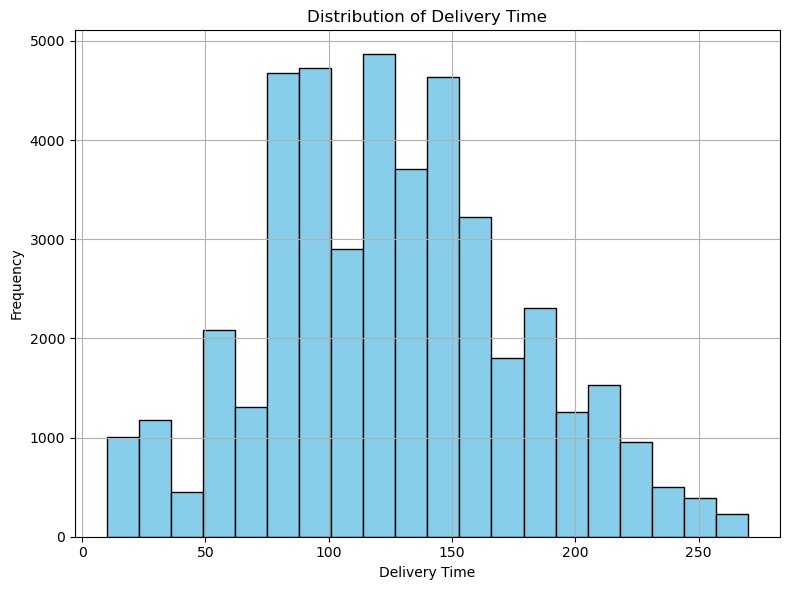

In [19]:
# Histogram of Delivery Time
plt.figure(figsize=(8, 6))
plt.hist(df['Delivery_Time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
